In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 부모의 교육 수준에 따른 학생의 학업 성취도 데이터

In [3]:
exam_df = pd.read_csv("./StudentsPerformance.csv")
exam_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
exam_df.sort_values(by='race/ethnicity')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
778,female,group A,some college,standard,completed,72,79,82
546,female,group A,some high school,standard,completed,92,100,97
820,female,group A,some high school,standard,completed,85,90,92
741,female,group A,associate's degree,free/reduced,none,37,57,56
305,male,group A,some college,standard,none,69,67,69
...,...,...,...,...,...,...,...,...
297,male,group E,associate's degree,standard,completed,71,74,68
293,female,group E,bachelor's degree,standard,none,65,73,75
289,male,group E,some high school,standard,completed,77,76,77
206,male,group E,bachelor's degree,standard,none,82,62,62


In [5]:
exam_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
exam_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [7]:
exam_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
exam_df.groupby(['race/ethnicity']).count()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,89,89,89,89,89,89,89
group B,190,190,190,190,190,190,190
group C,319,319,319,319,319,319,319
group D,262,262,262,262,262,262,262
group E,140,140,140,140,140,140,140


In [13]:
exam_df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

master's degree    석사  
bachelor's degree  학사  
associate's degree 준학사  
some college       대학 학점을 받았지만 학위를 수료하지 않고 졸업장을 수여하지 않은 사람을 의미  
hige school        고등학교 졸업  
some high scholl   고등학교 중퇴

In [20]:
exam_mean = exam_df[['math score', 'reading score', 'writing score']].sum()/exam_df['gender'].count()
exam_mean

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [55]:
over_math_mean = exam_df['math score'] > exam_mean[0]
over_reading_mean = exam_df['reading score'] > exam_mean[1]
over_writing_mean = exam_df['writing score'] > exam_mean[2]
over_exam_mean = exam_df[over_math_mean & over_reading_mean & over_writing_mean]

high_score_student_count = over_exam_mean['gender'].groupby(by=over_exam_mean['parental level of education']).count()
high_score_student_count 

parental level of education
associate's degree    89
bachelor's degree     51
high school           52
master's degree       32
some college          91
some high school      59
Name: gender, dtype: int64

In [56]:
total_of_each_degree = exam_df['gender'].groupby(by=exam_df['parental level of education']).count()
total_of_each_degree

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: gender, dtype: int64

In [52]:
high_score_student_mean = high_score_student_count / total_of_each_degree * 100

In [54]:
high_score_student_mean.sort_values(ascending=False)

parental level of education
master's degree       54.237288
bachelor's degree     43.220339
some college          40.265487
associate's degree    40.090090
some high school      32.960894
high school           26.530612
Name: gender, dtype: float64

(array([1., 0., 1., 0., 2., 0., 1., 0., 0., 1.]),
 array([26.53061224, 29.30127983, 32.07194742, 34.84261501, 37.6132826 ,
        40.38395019, 43.15461778, 45.92528537, 48.69595296, 51.46662055,
        54.23728814]),
 <BarContainer object of 10 artists>)

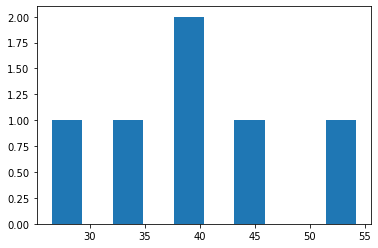

In [57]:
plt.hist(high_score_student_mean)

In [ ]:
exam_df['']